<a href="https://colab.research.google.com/github/spentaur/DS-Unit-1-Sprint-2-Data-Wrangling-and-Storytelling/blob/master/DS_Unit_1_Sprint_Challenge_2_Data_Wrangling_and_Storytelling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Science Unit 1 Sprint Challenge 2

## Data Wrangling and Storytelling

Taming data from its raw form into informative insights and stories.

## Data Wrangling

In this Sprint Challenge you will first "wrangle" some data from [Gapminder](https://www.gapminder.org/about-gapminder/), a Swedish non-profit co-founded by Hans Rosling. "Gapminder produces free teaching resources making the world understandable based on reliable statistics."
- [Cell phones (total), by country and year](https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--cell_phones_total--by--geo--time.csv)
- [Population (total), by country and year](https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--population_total--by--geo--time.csv)
- [Geo country codes](https://github.com/open-numbers/ddf--gapminder--systema_globalis/blob/master/ddf--entities--geo--country.csv)

These two links have everything you need to successfully complete the first part of this sprint challenge.
- [Pandas documentation: Working with Text Data](https://pandas.pydata.org/pandas-docs/stable/text.html) (one question)
- [Pandas Cheat Sheet](https://github.com/pandas-dev/pandas/blob/master/doc/cheatsheet/Pandas_Cheat_Sheet.pdf) (everything else)

### Part 0. Load data

You don't need to add or change anything here. Just run this cell and it loads the data for you, into three dataframes.

In [0]:
import pandas as pd

cell_phones = pd.read_csv('https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--cell_phones_total--by--geo--time.csv')

population = pd.read_csv('https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--population_total--by--geo--time.csv')

geo_country_codes = (pd.read_csv('https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--entities--geo--country.csv')
                       .rename(columns={'country': 'geo', 'name': 'country'}))

In [0]:
def start():
    options = {
        'display': {
            'max_columns': None,
            'max_colwidth': 25,
            'expand_frame_repr': False,  # Don't wrap to multiple pages
            'max_rows': 50,
            'max_seq_items': 50,         # Max length of printed sequence
            'precision': 4,
            'show_dimensions': False
        },
        'mode': {
            'chained_assignment': None   # Controls SettingWithCopyWarning
        }
    }
    for category, option in options.items():
        for op, value in option.items():
            pd.set_option(f'{category}.{op}', value)  # Python 3.6+
start()

### Part 1. Join data

First, join the `cell_phones` and `population` dataframes (with an inner join on `geo` and `time`).

The resulting dataframe's shape should be: (8590, 4)

In [3]:
cell_phones.sort_values(by="time")

,geo,time,cell_phones_total
0,abw,1960,0.0000e+00
8989,wsm,1960,0.0000e+00
7133,rus,1960,0.0000e+00
2790,fra,1960,0.0000e+00
7087,rou,1960,0.0000e+00
2836,fro,1960,0.0000e+00
2880,fsm,1960,0.0000e+00
307,arm,1960,0.0000e+00
2925,gab,1960,0.0000e+00
2971,gbr,1960,0.0000e+00


In [4]:
population.loc[population['time'] < 2018].tail(50)

,geo,time,population_total
59164,zwe,1968,4851431
59165,zwe,1969,5009514
59166,zwe,1970,5175618
59167,zwe,1971,5351195
59168,zwe,1972,5535874
59169,zwe,1973,5727044
59170,zwe,1974,5920943
59171,zwe,1975,6115370
59172,zwe,1976,6308300
59173,zwe,1977,6501893


In [5]:
population.loc[(population['time'] == 2017) & (population['geo'] == 'zwe')]

,geo,time,population_total
59213,zwe,2017,16529904


In [6]:
cell_phones.loc[(cell_phones['time'] == 2017) & (cell_phones['geo'] == 'zwe')]

,geo,time,cell_phones_total
9214,zwe,2017,1.4092e+07


In [7]:
# First, join the cell_phones and population dataframes (with an inner join on geo and time).

# The resulting dataframe's shape should be: (8590, 4)

merged = cell_phones.merge(population)

merged.loc[(merged['time'] == 2017) & (merged['geo'] == 'zwe')]



,geo,time,cell_phones_total,population_total
8589,zwe,2017,1.4092e+07,16529904


Then, select the `geo` and `country` columns from the `geo_country_codes` dataframe, and join with your population and cell phone data.

The resulting dataframe's shape should be: (8590, 5)

In [8]:
df = merged.merge(geo_country_codes[['geo', 'country']])

df.loc[(df['time'] == 2017) & (df['geo'] == 'usa')]

,geo,time,cell_phones_total,population_total,country
8134,usa,2017,3.9588e+08,324459463,United States


### Part 2. Make features

Calculate the number of cell phones per person, and add this column onto your dataframe.

(You've calculated correctly if you get 1.220 cell phones per person in the United States in 2017.)

In [9]:
df['cell_phones_per_person'] = round(df['cell_phones_total'] / df['population_total'], 3)

df.loc[(df['time'] == 2017) & (df['geo'] == 'usa')]

,geo,time,cell_phones_total,population_total,country,cell_phones_per_person
8134,usa,2017,3.9588e+08,324459463,United States,1.22


Modify the `geo` column to make the geo codes uppercase instead of lowercase.

In [10]:
df['geo'] = df['geo'].str.upper()

df.head()

,geo,time,cell_phones_total,population_total,country,cell_phones_per_person
0,AFG,1960,0.0,8996351,Afghanistan,0.0
1,AFG,1965,0.0,9938414,Afghanistan,0.0
2,AFG,1970,0.0,11126123,Afghanistan,0.0
3,AFG,1975,0.0,12590286,Afghanistan,0.0
4,AFG,1976,0.0,12840299,Afghanistan,0.0


### Part 3. Process data

Use the describe function, to describe your dataframe's numeric columns, and then its non-numeric columns.

(You'll see the time period ranges from 1960 to 2017, and there are 195 unique countries represented.)

In [11]:
df.describe()

,time,cell_phones_total,population_total,cell_phones_per_person
count,8590.0000,8.5900e+03,8.5900e+03,8590.0000
mean,1994.1935,9.0049e+06,2.9838e+07,0.2796
std,14.2580,5.5734e+07,1.1613e+08,0.4542
min,1960.0000,0.0000e+00,4.4330e+03,0.0000
25%,1983.0000,0.0000e+00,1.4561e+06,0.0000
50%,1995.0000,6.2000e+03,5.7251e+06,0.0020
75%,2006.0000,1.6977e+06,1.8106e+07,0.4610
max,2017.0000,1.4741e+09,1.4095e+09,2.4900


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8590 entries, 0 to 8589
Data columns (total 6 columns):
geo                       8590 non-null object
time                      8590 non-null int64
cell_phones_total         8590 non-null float64
population_total          8590 non-null int64
country                   8590 non-null object
cell_phones_per_person    8590 non-null float64
dtypes: float64(2), int64(2), object(2)
memory usage: 469.8+ KB


In [13]:
df.describe(include='object')

,geo,country
count,8590,8590
unique,195,195
top,PAK,Sao Tome and Principe
freq,46,46


In 2017, what were the top 5 countries with the most cell phones total?

Your list of countries should have these totals:

| country | cell phones total |
|:-------:|:-----------------:|
|    ?    |     1,474,097,000 |
|    ?    |     1,168,902,277 |
|    ?    |       458,923,202 |
|    ?    |       395,881,000 |
|    ?    |       236,488,548 |



In [0]:
# This optional code formats float numbers with comma separators
pd.options.display.float_format = '{:,}'.format

In [15]:
df[['country', 'cell_phones_total']].loc[df['time'] == 2017].nlargest(5, 'cell_phones_total')

,country,cell_phones_total
1496,China,"1,474,097,000.0"
3595,India,"1,168,902,277.0"
3549,Indonesia,"458,923,202.0"
8134,United States,"395,881,000.0"
1084,Brazil,"236,488,548.0"


2017 was the first year that China had more cell phones than people.

What was the first year that the USA had more cell phones than people?

In [16]:
df['time'].loc[(df['cell_phones_per_person'] > 1) & (df['geo'] == 'USA')].iloc[0]

2014

### Part 4. Reshape data

*This part is not needed to pass the sprint challenge, only to get a 3! Only work on this after completing the other sections.*

Create a pivot table:
- Columns: Years 2007—2017
- Rows: China, India, United States, Indonesia, Brazil (order doesn't matter)
- Values: Cell Phones Total

The table's shape should be: (5, 11)

In [0]:
rows = ['China', 'India', 'United States', 'Indonesia', 'Brazil']

pivoted = df[['country', 'cell_phones_total', 'time']].loc[
            (df['country'].isin(rows)) & (df['time'].
            between(2007, 2017, inclusive=True))]
pivoted = pd.pivot_table(pivoted, values='cell_phones_total', index=['country'],
                         columns=['time'])

# this feels like the wrong way of doing this
# pivoted['diff'] = pivoted[2017] - pivoted[2007]
# diffs = pivoted.sort_values((pivoted[2017] - pivoted[2007]), ascending=False)

# this maybe feels a little better, since i'm not adding another columns
diffs = (pivoted[2017] - pivoted[2007]).sort_values(ascending=False)



In [18]:
df.loc[df['time'][2007:2017]]

,geo,time,cell_phones_total,population_total,country,cell_phones_per_person
1980,CZE,1999,"1,944,553.0",10306645,Czech Republic,0.189
1981,CZE,2000,"4,346,009.0",10289594,Czech Republic,0.422
1982,CZE,2001,"6,947,151.0",10271204,Czech Republic,0.676
1983,CZE,2002,"8,610,177.0",10252439,Czech Republic,0.84
1984,CZE,2003,"9,708,683.0",10239277,Czech Republic,0.948
1985,CZE,2004,"10,782,567.0",10239536,Czech Republic,1.053
1986,CZE,2005,"11,775,878.0",10258176,Czech Republic,1.148
1987,CZE,2006,"12,406,199.0",10298288,Czech Republic,1.205
1988,CZE,2007,"13,228,631.0",10356586,Czech Republic,1.277
1989,CZE,2008,"13,780,165.0",10423794,Czech Republic,1.322


Sort these 5 countries, by biggest increase in cell phones from 2007 to 2017.

Which country had 935,282,277 more cell phones in 2017 versus 2007?

In [19]:
diffs.index[0]

'India'

If you have the time and curiosity, what other questions can you ask and answer with this data?

## Data Storytelling

In this part of the sprint challenge you'll work with a dataset from **FiveThirtyEight's article, [Every Guest Jon Stewart Ever Had On ‘The Daily Show’](https://fivethirtyeight.com/features/every-guest-jon-stewart-ever-had-on-the-daily-show/)**!

### Part 0 — Run this starter code

You don't need to add or change anything here. Just run this cell and it loads the data for you, into a dataframe named `df`.

(You can explore the data if you want, but it's not required to pass the Sprint Challenge.)

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

url = 'https://raw.githubusercontent.com/fivethirtyeight/data/master/daily-show-guests/daily_show_guests.csv'
df = pd.read_csv(url).rename(columns={'YEAR': 'Year', 'Raw_Guest_List': 'Guest'})

def get_occupation(group):
    if group in ['Acting', 'Comedy', 'Musician']:
        return 'Acting, Comedy & Music'
    elif group in ['Media', 'media']:
        return 'Media'
    elif group in ['Government', 'Politician', 'Political Aide']:
        return 'Government and Politics'
    else:
        return 'Other'
      
df['Occupation'] = df['Group'].apply(get_occupation)

### Part 1 — What's the breakdown of guests’ occupations per year?

For example, in 1999, what percentage of guests were actors, comedians, or musicians? What percentage were in the media? What percentage were in politics? What percentage were from another occupation?

Then, what about in 2000? In 2001? And so on, up through 2015.

So, **for each year of _The Daily Show_, calculate the percentage of guests from each occupation:**
- Acting, Comedy & Music
- Government and Politics
- Media
- Other

#### Hints:
You can make a crosstab. (See pandas documentation for examples, explanation, and parameters.)

You'll know you've calculated correctly when the percentage of "Acting, Comedy & Music" guests is 90.36% in 1999, and 45% in 2015.

In [21]:
ct = pd.crosstab(df['Year'], df['Occupation'], normalize='index')*100
ct.round(2)

Occupation,"Acting, Comedy & Music",Government and Politics,Media,Other
Year,,,,
1999,90.36,1.2,6.63,1.81
2000,73.96,8.28,12.43,5.33
2001,72.61,3.82,19.75,3.82
2002,62.26,6.92,26.42,4.4
2003,56.02,10.24,24.7,9.04
2004,38.41,22.56,27.44,11.59
2005,37.04,16.05,33.33,13.58
2006,36.02,19.25,29.19,15.53
2007,25.53,17.02,33.33,24.11


In [22]:
ct.index.min()

1999

### Part 2 — Recreate this explanatory visualization:

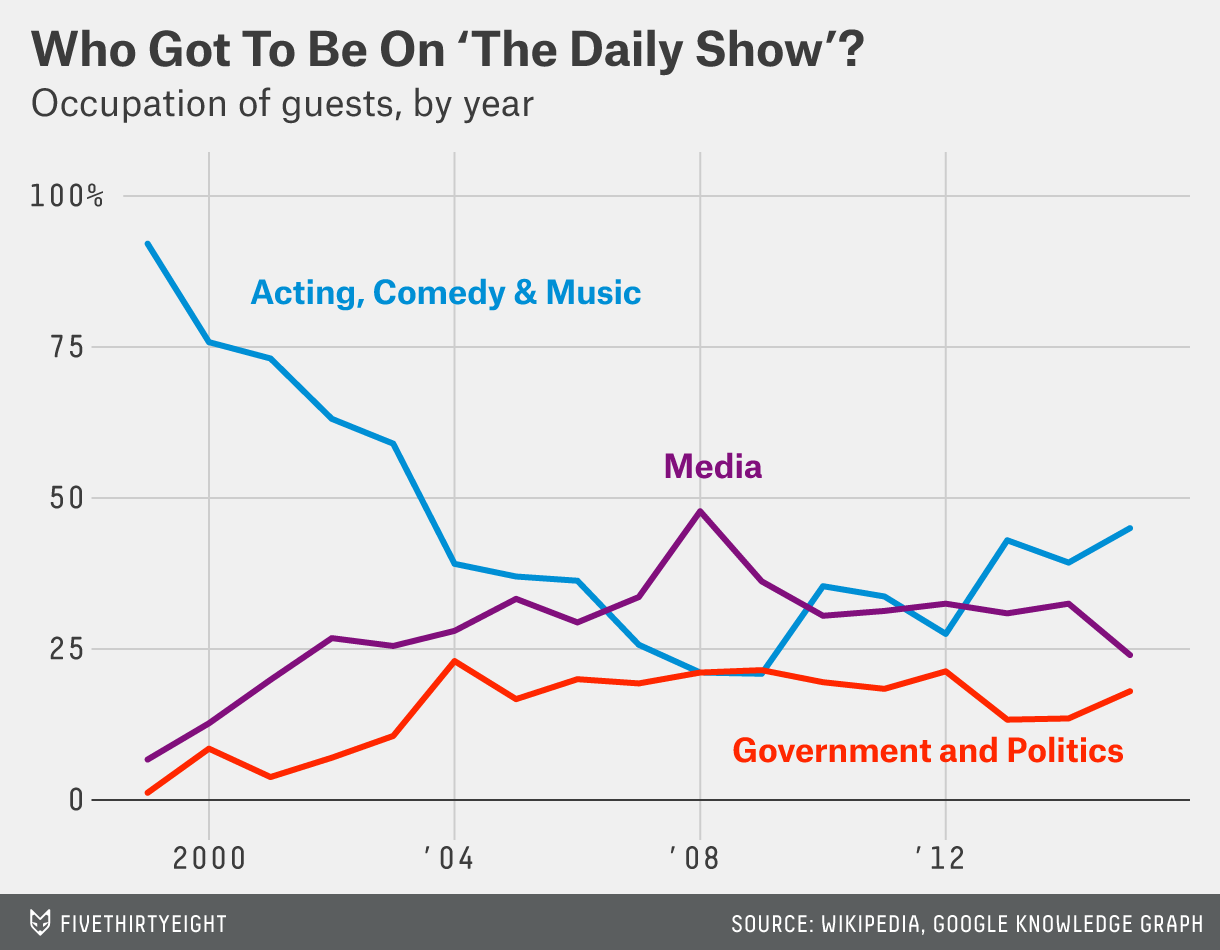

In [23]:
from IPython.display import display, Image
png = 'https://fivethirtyeight.com/wp-content/uploads/2015/08/hickey-datalab-dailyshow.png'
example = Image(png, width=500)
display(example)

**Hints:**
- You can choose any Python visualization library you want. I've verified the plot can be reproduced with matplotlib, pandas plot, or seaborn. I assume other libraries like altair or plotly would work too.
- If you choose to use seaborn, you may want to upgrade the version to 0.9.0.

**Expectations:** Your plot should include:
- 3 lines visualizing "occupation of guests, by year." The shapes of the lines should look roughly identical to 538's example. Each line should be a different color. (But you don't need to use the _same_ colors as 538.)
- Legend or labels for the lines. (But you don't need each label positioned next to its line or colored like 538.)
- Title in the upper left: _"Who Got To Be On 'The Daily Show'?"_ with more visual emphasis than the subtitle. (Bolder and/or larger font.)
- Subtitle underneath the title: _"Occupation of guests, by year"_

**Optional Bonus Challenge:**
- Give your plot polished aesthetics, with improved resemblance to the 538 example.
- Any visual element not specifically mentioned in the expectations is an optional bonus.

In [0]:
# %%sh
# wget https://github.com/google/fonts/raw/master/apache/roboto/Roboto-Regular.ttf
# wget https://github.com/google/fonts/raw/master/apache/roboto/Roboto-Bold.ttf
# mv /content/*.ttf /usr/share/fonts/truetype/
# sudo fc-cache -fv
# sudo rm -fr /root/.cache/matplotlib
# fc-list

In [0]:
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = 'Roboto'

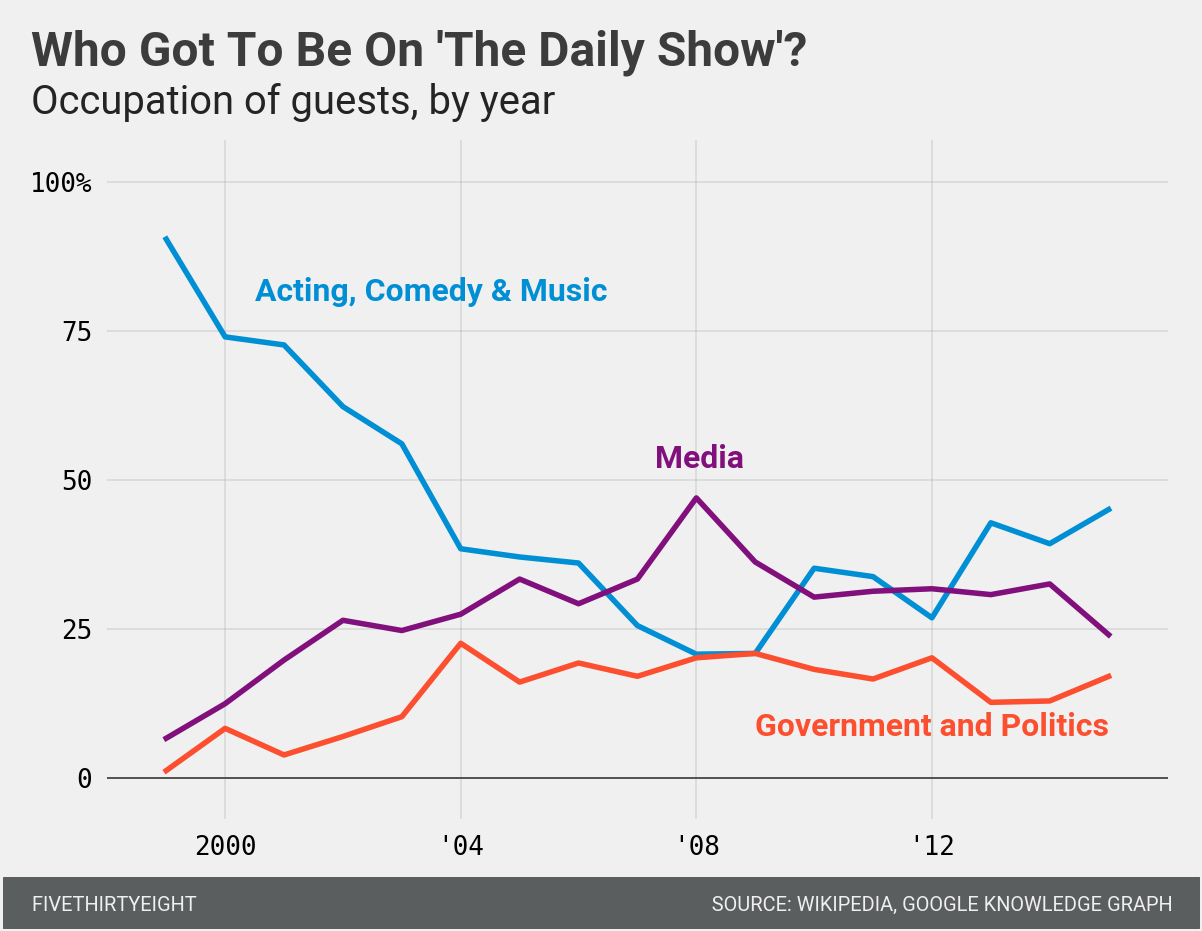

In [128]:
fig, ax = plt.subplots(facecolor='#f0f0f0')

# create the plot 
graphy = ct[['Acting, Comedy & Music', 'Government and Politics', 'Media']].plot(
    legend=None, ax=ax, linewidth=5.5, color=['#008fd5', '#fc4f30', '#810f7c'],
    figsize=(19,12.5))

graphy.set(xlim=(1998, 2016), ylim=(-7,107))
graphy.set_facecolor('#f0f0f0')
graphy.tick_params(axis='both', pad=15, length=0)

# i hate how hacky this feels, there's gotta be a better way...
topmargin = graphy.text(x = 1997, y = 126, s = """
""")

# setting all the text
title = graphy.text(x = 1996.7, y = 119.5, s = "Who Got To Be On 'The Daily Show'?",
               fontsize = 48, weight = 'bold', alpha = .75)
subtitle = graphy.text(x = 1996.7, y = 111.3, 
               s = 'Occupation of guests, by year',
              fontsize = 40, alpha = .85)

acting = graphy.text(x = 2000.5, y = 80, 
               s = 'Acting, Comedy & Music',
              fontsize = 32, color='#008fd5', fontweight="bold")
gov = graphy.text(x = 2009, y = 7, 
               s = 'Government and Politics',
              fontsize = 32, color='#fc4f30', fontweight="bold")
media =  graphy.text(x = 2007.3, y = 52, 
               s = 'Media',
              fontsize = 32, color='#810f7c', fontweight="bold")

# this just feels wrong
graphy.text(x = 1996.3, y = -24, 
         s = """
_____________________________________________________________________________________________________________________________________________________                                                                                                                                 
         """,
         fontsize = 12, color = '#5b5e5f', backgroundcolor = '#5b5e5f')
graphy.text(x = 1996.3, y = -22.4, 
         s = '     FIVETHIRTYEIGHT                                                                                                       SOURCE: WIKIPEDIA, GOOGLE KNOWLEDGE GRAPH    ',
         fontsize = 20, color = '#f0f0f0')


plt.xticks([2000, 2004,2008,2012], ["2000", "'04", "'08", "'12"], fontsize=26, fontfamily="monospace")
plt.yticks([0,25,50,75,100], ["0", "25", "50","75","100%"], fontsize=26, fontfamily="monospace")
plt.xlabel(None)
plt.axhline(linewidth=2, color="#555555")
plt.grid(linewidth=2, alpha=.3)
plt.box(on=None)
plt.show()

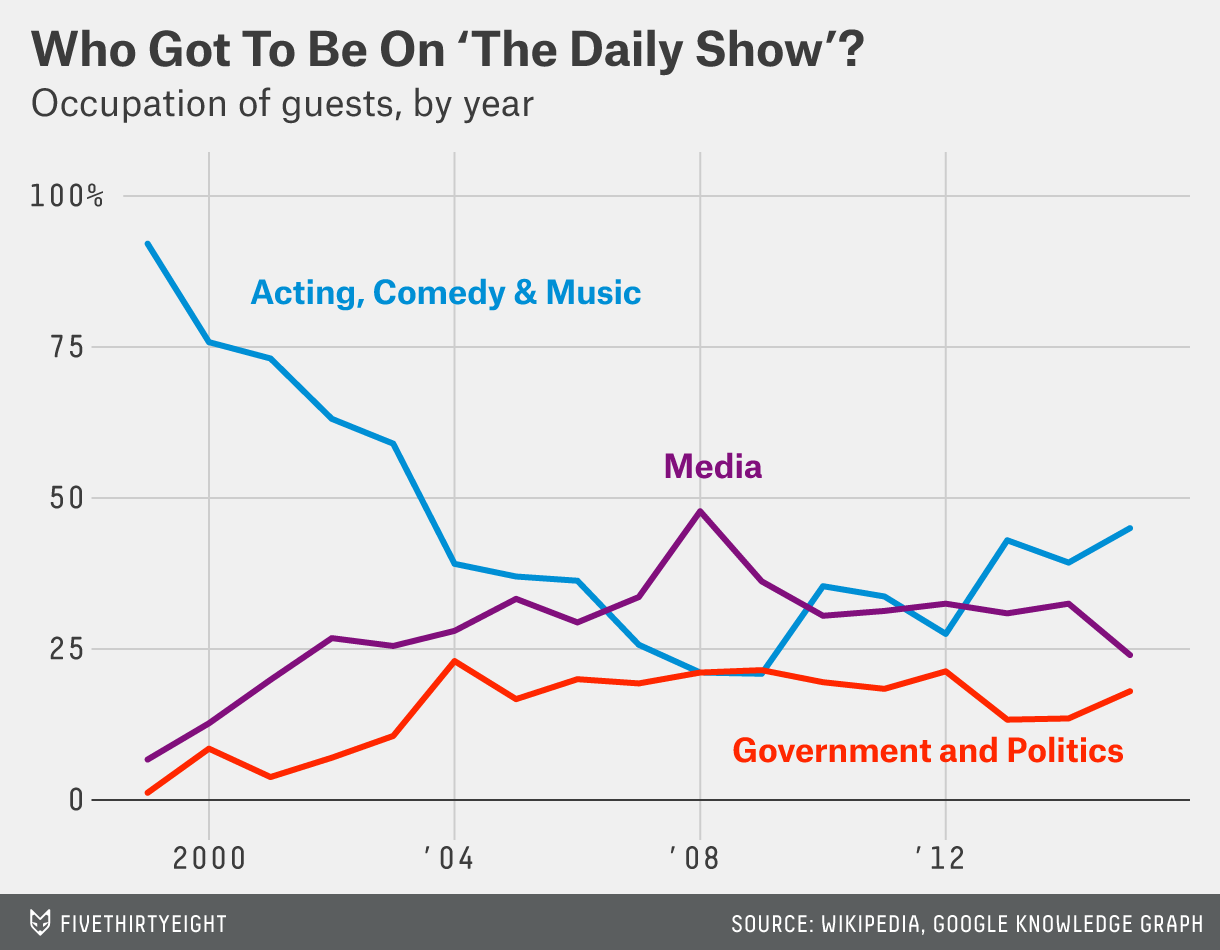

In [126]:
display(example)